In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


Data imported into Jupyter notebook, displaying a part of it to be able to see the data.

In [3]:
from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 1:23].values
y = data.iloc[:,23].values

Data set was divided into features (X) and targets (y). 

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.20,
                                                    stratify=y,
                                                    random_state=1)

In [5]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


Holdout method applied. Data split into training and validation set. 

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
k_range = range(4,11)
knn = KNeighborsClassifier(n_neighbors=k_range)

In [7]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': range(4, 11)}


Initializing the K-Nearest Neighbors algorithm. 

In [8]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy',n_jobs=-1)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=range(4, 11), p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(4, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [9]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8012820512820513
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


GridsearchCv algorithm was run to do the kfold cross validation with various K values. K=6 was found to be the best k value. it has the highest accuracy score, and low standard deviation.

In [10]:
grid.grid_scores_

C:\Users\tejed\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77564, std: 0.09329, params: {'n_neighbors': 4},
 mean: 0.77564, std: 0.06336, params: {'n_neighbors': 5},
 mean: 0.80128, std: 0.06369, params: {'n_neighbors': 6},
 mean: 0.80128, std: 0.07649, params: {'n_neighbors': 7},
 mean: 0.80128, std: 0.07990, params: {'n_neighbors': 8},
 mean: 0.79487, std: 0.08571, params: {'n_neighbors': 9},
 mean: 0.79487, std: 0.08749, params: {'n_neighbors': 10}]

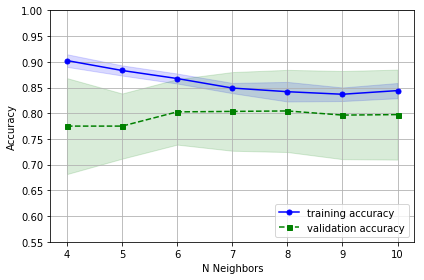

In [12]:
from sklearn.model_selection import validation_curve

param_range = [4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(
                estimator=grid.estimator, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)

train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('N Neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.55, 1.0])
plt.tight_layout()
plt.show()

Plotting learning curve. Shuffle split function used to run 100 interation of cross validation smooth out curve

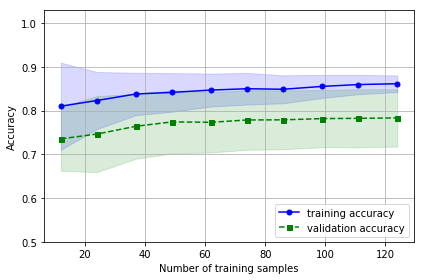

In [13]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

cv=ShuffleSplit(n_splits=100,test_size=.20,random_state=1)
train_sizes, train_scores, test_scores =learning_curve(estimator=grid.best_estimator_, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=cv,
                                                       n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')


plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

Plotting Validation curve using the range of Ks as the parameter. 